**Import the required libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Dataset.**

In [ ]:
data = pd.read_csv("sample_candidates_pool.csv")
data.head()

,ID,Name,Surname,Email,Location,Job Functions,Occupations,Skills,Updated at
0,1,Julian,Washington,samanthaharris@rodriguez-hill.com,New York,Legal,Guide,"Java, Leadership, Project Management",2024-05-28
1,2,Mackenzie,Clements,meganhicks@gmail.com,Denver,Customer Service,"Account Executive, Influencer Marketing",Excel,2024-01-12
2,3,Kevin,Rhodes,john25@miller.com,Seattle,Management,Mechanical Engineer,Problem Solving,2024-02-16
3,4,Tara,Diaz,ddavis@gmail.com,Boston,"Business Development, Sales & Account Manageme...","HVAC Engineer, Customer Service, Business Inte...","Communication, Project Management, Problem Sol...",2024-04-19
4,5,Amanda,Lara,udorsey@spencer-lewis.info,Seattle,"Logistics & Supply Chain, Information Technology","Financial Analyst, Tax Manager, Payroll Specia...","Leadership, Project Management",2024-07-16


**Data Preprocessing**

First of all before starting our data analysis we will check if the variables have been register right and if we have any missing values(NA).

In [ ]:
data.dtypes

,0
ID,int64
Name,object
Surname,object
Email,object
Location,object
Job Functions,object
Occupations,object
Skills,object
Updated at,object


As we can see above  we have only categorical variables.

In [ ]:
data.isnull().sum()

,0
ID,0
Name,0
Surname,0
Email,0
Location,0
Job Functions,0
Occupations,0
Skills,0
Updated at,0


We can see above that there are no missing values in our dataset.


As we can see our dataset contains information about 2000 candidates. For which all the information is divided to nine columns. The columns are:
ID ,
Name ,
Surname ,
Email,
Location,
Job Function,
Occupation,
Skills,
Updated at.



In [ ]:
data.shape

(2000, 9)


Now to find the distribution of pool per Location we will group the data by the  column "Location" and calculate the number of rows in each group.

From the table below we can see that the number of candidates ranging from 222 to 266.  

In [ ]:
data.groupby('Location').size()

,0
Location,
Austin,264
Boston,266
Chicago,258
Denver,261
Los Angeles,253
New York,244
San Francisco,232
Seattle,222


Something that we can visually check from the barchart below.

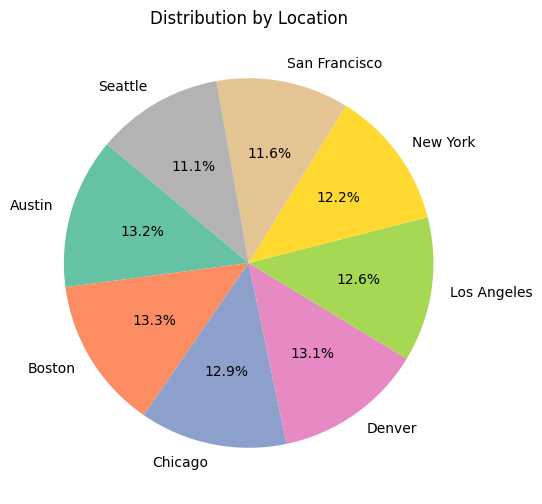

In [ ]:
data.groupby('Location').size().plot(
    kind='pie',
    colors=sns.color_palette('Set2'),
    autopct='%1.1f%%',
    startangle=140,
    figsize=(6, 6)
)

plt.title('Distribution by Location')
plt.ylabel('')
plt.show()

Same candidate in the column 'Job Function' have more than one option.So we have to seperate the data based on the column Job Function so we can see the distribution of pool per job function.

First, we splits (str.split(', '))the Job Function ,based on the comma and creates a new column named 'Job_Function' (.assign())

In [ ]:
data_expanded = data.assign(Job_Functions=data['Job Functions'].str.split(', '))

With the function .explode() we transform each element of the list 'Job_Function' into a seperate row.

In [ ]:
data_expanded = data_expanded.explode('Job_Functions')

And we save the transformed data to csv file.



In [ ]:
data_expanded.to_csv('.csv', index=False)

In [ ]:
data_expanded.head()

,ID,Name,Surname,Email,Location,Job Functions,Occupations,Skills,Updated at,Job_Functions
0,1,Julian,Washington,samanthaharris@rodriguez-hill.com,New York,Legal,Guide,"Java, Leadership, Project Management",2024-05-28,Legal
1,2,Mackenzie,Clements,meganhicks@gmail.com,Denver,Customer Service,"Account Executive, Influencer Marketing",Excel,2024-01-12,Customer Service
2,3,Kevin,Rhodes,john25@miller.com,Seattle,Management,Mechanical Engineer,Problem Solving,2024-02-16,Management
3,4,Tara,Diaz,ddavis@gmail.com,Boston,"Business Development, Sales & Account Manageme...","HVAC Engineer, Customer Service, Business Inte...","Communication, Project Management, Problem Sol...",2024-04-19,Business Development
3,4,Tara,Diaz,ddavis@gmail.com,Boston,"Business Development, Sales & Account Manageme...","HVAC Engineer, Customer Service, Business Inte...","Communication, Project Management, Problem Sol...",2024-04-19,Sales & Account Management


In [ ]:
#data_expanded.tail(20)


Now to find the distribution of pool per job function we will group the data by the new column "Job_Function" and calculate the number of rows in each group.

In [ ]:
data_expanded.groupby('Job_Functions').size()


,0
Job_Functions,
Administration,216
Arts and Design,221
Business Development,213
Customer Service,224
Data Science,202
Engineering,237
Finance,231
Human Resources,226
Information Technology,243


And another question is how many candidates have updates their status the last week, from 22 July 2024 to 26 July 2024.


Creating a new DataFrame named 'candidate_lastweek' that have the rows from the DataFrame 'data' where the values in column 'Updated at' are from '2024-07-22' to '2024-07-26'.
After we save the DataFrame 'candidate_lastweek' to csv file and the 'index=False ' indicates that we will not be included in the output file.

In [ ]:
candidate_lastweek = data[(data['Updated at'] >= '2024-07-22') & (data['Updated at'] <= '2024-07-26')]
candidate_lastweek.to_csv('.csv', index=False)


From the function shape we can see that 24 candidates added the last week.

In [ ]:
candidate_lastweek.shape

(24, 9)

And with the function head we can see all the all the information about them.

In [ ]:
candidate_lastweek.head(24)

,ID,Name,Surname,Email,Location,Job Functions,Occupations,Skills,Updated at
79,80,Matthew,Long,sandy54@bishop.com,Chicago,"Legal, Engineering, Data Science",People Operations,"Java, Communication",2024-07-25
152,153,Heather,Brown,showard@hotmail.com,Los Angeles,"Information Technology, Arts and Design","Professor, Product Manager, Technical Office E...",Project Management,2024-07-26
286,287,Peter,Velasquez,angela71@reid-smith.info,Los Angeles,Arts and Design,HR Generalist,"Leadership, Java",2024-07-22
382,383,Michelle,Gray,jamesfriedman@hotmail.com,Austin,Customer Service,Network Engineer,Tableau,2024-07-22
499,500,Amanda,Obrien,welchalicia@yahoo.com,New York,Operations,Consultant Engineer,"Python, SQL, Tableau",2024-07-26
578,579,Brian,Lopez,wrightrichard@yahoo.com,Denver,"Management, Teaching & Education, Business Dev...","Planner, Data Engineer","Communication, SQL",2024-07-22
628,629,Stephanie,Rodriguez,smiller@spencer.net,Los Angeles,"Research, Engineering, Data Science",Cloud Engineer,"Communication, Python, Excel",2024-07-22
651,652,Tammy,Jones,suttonnathan@pope-bowman.biz,Seattle,Data Science,Shift Supervisor,Project Management,2024-07-25
652,653,Benjamin,Yu,jimenezmiguel@hotmail.com,Austin,"Management Consulting, Marketing, Customer Ser...",Investor Relations,"Java, SQL, Problem Solving",2024-07-22
665,666,Brandon,Lloyd,gloverdaniel@gmail.com,Los Angeles,Arts and Design,Embedded Engineer,"Java, Excel, Leadership",2024-07-24


Additional to see the applicant that were added today 29 July 2024 we will use the same function as above.So we create new DataFrame 'candidate_today'.

In [ ]:
candidate_today = data[data['Updated at'] == '2024-07-29']
candidate_today.to_csv('.csv', index=False)


We have only seven new candidates today.

In [ ]:
candidate_today.shape

(7, 9)

In [ ]:
candidate_today.head(7)

,ID,Name,Surname,Email,Location,Job Functions,Occupations,Skills,Updated at
43,44,Sabrina,Baker,rodriguezdakota@hotmail.com,Boston,"Operations, Management, Finance","Accommodation Manager, Naval Architect",Excel,2024-07-29
343,344,Karen,Delgado,jasmine20@hotmail.com,Chicago,Arts and Design,"Tax Manager, Chartering, Budgeting","SQL, Communication",2024-07-29
643,644,Emily,Rogers,smithisabel@morris.com,Chicago,Marketing,"Architect, Financial Analyst, Hardware Engineer",Python,2024-07-29
958,959,Mary,Graham,johnsoncody@hotmail.com,Seattle,"Business Development, Sales & Account Manageme...","UX Writer, Mechanical Engineer, Project Manager","Tableau, PowerBI",2024-07-29
1097,1098,Manuel,Petty,zlee@jones-jones.biz,Boston,"Legal, Research, Software Development","Health & Safety Engineer, Software Architect, ...",Excel,2024-07-29
1556,1557,Jesse,Hunter,glennwendy@thompson.com,Los Angeles,Arts and Design,"Account Executive, Technician","Tableau, SQL, Java",2024-07-29
1917,1918,Robert,Mcdonald,shirleymendoza@olson.com,San Francisco,"Research, Data Science, Logistics & Supply Chain","Graphic & Motion Designer, Budgeting, Frontend...","SQL, Project Management, Java",2024-07-29
